## Интеллектуальный анализ данных – весна 2021
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html). 

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования.

Все признаки в наборе данных являются числовыми. Пропусков нет.

In [ ]:
print(data.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [ ]:
X.dtypes

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
dtype: object

In [ ]:
X.isnull().any().any()

False

**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

In [ ]:
np.random.seed(25022021)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25022021)

**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

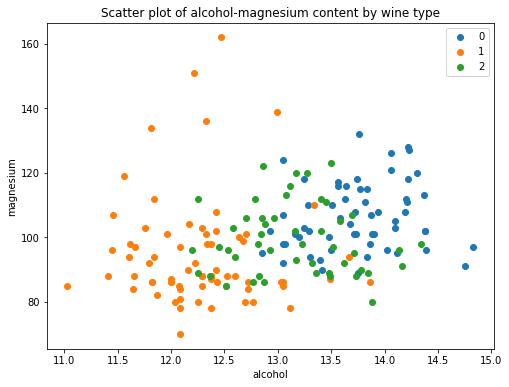

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.scatter(X['alcohol'][:59], X['magnesium'][:59], label='0')
ax.scatter(X['alcohol'][59:130], X['magnesium'][59:130], label='1')
ax.scatter(X['alcohol'][130:], X['magnesium'][130:], label='2')

ax.legend()
ax.set_xlabel('alcohol')
ax.set_ylabel('magnesium')
ax.set_title('Scatter plot of alcohol-magnesium content by wine type');

In [ ]:
clfs = []

print('NN' + '\t ' + 'Train' + '\t ' + 'Test')
for k in [1, 3, 5, 10, 15, 25]:
    knn = KNeighborsClassifier(n_neighbors=k).fit(X_train_scaled[:, [0, 4]], y_train)
    pred_train = knn.predict(X_train_scaled[:, [0, 4]])
    pred_test = knn.predict(X_test_scaled[:, [0, 4]])
    print(f'{k:2}\t {accuracy_score(y_train, pred_train):.4f}\t {accuracy_score(y_test, pred_test):.4f}')
    
    clfs.append(knn)

NN	 Train	 Test
 1	 1.0000	 0.6296
 3	 0.8468	 0.6296
 5	 0.7903	 0.7222
10	 0.7661	 0.7407
15	 0.7419	 0.7593
25	 0.7339	 0.6852


**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/). 

In [ ]:
!pip install mlxtend

Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [ ]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов. 
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново. 
6. Построение графика может занять некоторое время – придётся немного подождать!

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(),

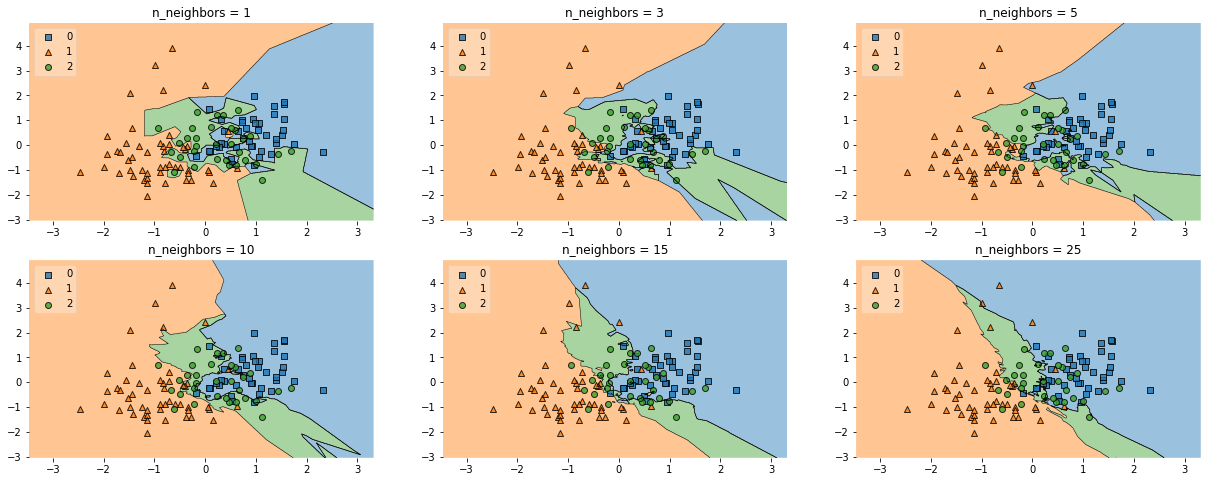

In [ ]:
fig = plt.figure(figsize=(21, 8))

gs = gridspec.GridSpec(2, 3, fig)
n_neighbors = [1, 3, 5, 10, 15, 25]

for clf, k, grd in zip(clfs, n_neighbors, list(itertools.product([0, 1, 2], repeat=2))[:6]):
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X_train_scaled[:, [0, 4]], y_train, clf, legend=2)
    plt.title(f'n_neighbors = {k}')

**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности.

Как видно из графиков, вина 0-го и 1-го типа хорошо группируются по содержанию алкоголя и магния, в то время как вина 2-го типа пересекаются с винами 0-го и 1-го. Опыт показал, что 15 соседей -- наиболее оптимальный выбор между 1, 3, 5, 10, 15 и 25. С геометрической точки зрения, меньшее количество соседей не хватает для модели, чтобы отделить вина 2-го типа от остальных.

### Задание 2: Обученная машина.

В этом задании мы рассмотрим упрощённую идею того, как метод ближайших соседей можно применить при моделировании движения робота. 

Рассмотрим робота на дискретной двумерной плоскости, который за каждый момент дискретного времени может передвинуться на одну позицию вправо, влево, вверх или вниз. На плоскости разбросаны метки одного из четырёх классов, анализируя которые робот может (но не обязан) корректировать своё перемещение. Пусть метки класса 0 соответствуют сигналу переместиться вправо, метки класса 1 – влево, класса 2 – вверх, класса 3 – вниз. 

Передвижение робота осуществляется по следующему правилу: с вероятностью 0.2 робот передвинется вправо, и с вероятностью 0.8 – оценит, метки какого класса преобладают среди `k` его ближайших соседей, и передвинется в направлении этого доминирующего класса. 

Для лучшего понимания происходящего изобразим возможное положение робота и меток:

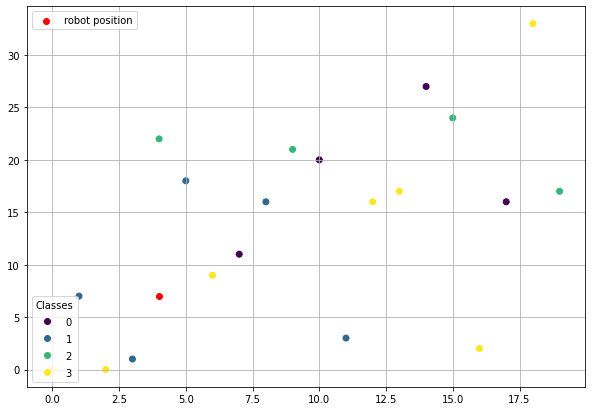

In [ ]:
np.random.seed(12345)
x = np.arange(20)
landmarks = x + np.round(np.random.normal(2, 8, 20)) # сгенерируем случайные метки
random_classes = np.random.randint(0, 4, 20)

fig, ax = plt.subplots(figsize = (10, 7))
scatter = ax.scatter(x, landmarks, c = random_classes)
ax.scatter(4, 7, c = 'r', marker = 'o', label = 'robot position')
legend1 = ax.legend(*scatter.legend_elements(),
                    loc = "lower left", title = "Classes")
ax.add_artist(legend1)

plt.plot()
_ = plt.legend()
_ = plt.grid()

На следующем шаге робот передвинется на 1 либо вправо, либо в направлении, которое указывают ближайшие соседи.

**Задача 2.1 (1.5 балла)** Реализуйте класс, который задаёт описанное поведение робота, используя шаблон ниже:
1. Определите атрибуты `trajectory` (переменная для хранения истории перемещения робота в виде последовательности точек с двумя координатами) и `knn` (обученный kNN классификатор, который по позиции метки предсказывает её класс).
2. Определите метод `move()`: рассчитайте новое положение робота по правилам выше и добавьте её в историю перемещений. Подсказка: исходы можно интерпретировать как результаты подбрасывания монетки с вероятностью орла, равной 0.2. Для моделирования такого подбрасывания можно использовать, например, `np.random.binomial()` с правильными параметрами. 

In [ ]:
class MobileRobot():
    
    def __init__(self, k, initial_position, landmarks, classes):
        '''
        Parameters:
        -----------
        k: int
            Number of neighbours
            
        initial_position: ndarray
            Initial position of the robot as a point, e.g. (-1, 1)
            
        landmarks: ndarray
            numpy array of shape (n_landmarks, 2) with the euclidean positions of points
        
        classes: ndarray
            numpy array of shape (n_landmarks, ) with class of landmark for each point in landmarks
        
        '''
        # Store the history of movements
        self.trajectory = [initial_position.copy()]
        
        self.pos = initial_position.copy()
        
        # kNN Classifier for determining the classes of landmarks
        self.knn = KNeighborsClassifier(n_neighbors=k, p=2).fit(landmarks, classes)
        
        # Mapping between classes of points and movements
        self.mapping = {0: np.array([1, 0]), 
                        1: np.array([-1, 0]),
                        2: np.array([0, 1]),
                        3: np.array([0, -1])}
        
    def move(self):
        '''
        Calculate new position of the robot and add it to the history
        '''
        go_right = np.random.binomial(1, 0.2)
        
        if go_right:
            self.pos += self.mapping[0]
            self.trajectory.append(self.pos.copy())
        else:
            pred = self.knn.predict(self.pos[np.newaxis, :])[0]
            self.pos += self.mapping[pred]
            self.trajectory.append(self.pos.copy())

**Задача 2.2 (0.5 балла)** Дополните функцию `conduct_experiment`: определите переменную `traj` так, чтобы она содержала историю перемещения робота в виде двумерного массива numpy, в котором столбцы соответствуют координатам x и y соответствующей позиции.

In [ ]:
def conduct_experiment(x,
                       mean = 0,
                       std = 2, 
                       n_movements = 10, 
                       k = 3, 
                       initial_position = np.array([10, 20])):
    
    np.random.seed(12345)
    # Generate random landmarks
    landmarks = np.vstack((x, x + np.round(np.random.normal(mean, std, len(x))))).T
    
    # Generate random classes of landmarks
    classes = np.random.randint(0, 4, size = len(x))
    
    # Conduct experiment
    robot = MobileRobot(k, initial_position, landmarks, classes)
    
    for n in range(n_movements):
        robot.move()

    fig, ax = plt.subplots(figsize = (10, 8))
    scatter = ax.scatter(landmarks[:, 0], landmarks[:, 1], c = classes)
    legend1 = ax.legend(*scatter.legend_elements(),
                        loc="lower left", title="classes")
    ax.add_artist(legend1)
    
    ax.set_title(f'k = {k}')
    
    traj = np.array([[pos[0], pos[1]] for pos in robot.trajectory])
    ax.plot(traj[:, 0], traj[:, 1], 
               c = 'r', marker = 'o', label = 'robot position')
    plt.plot()
    _ = plt.legend()
    _ = plt.grid()

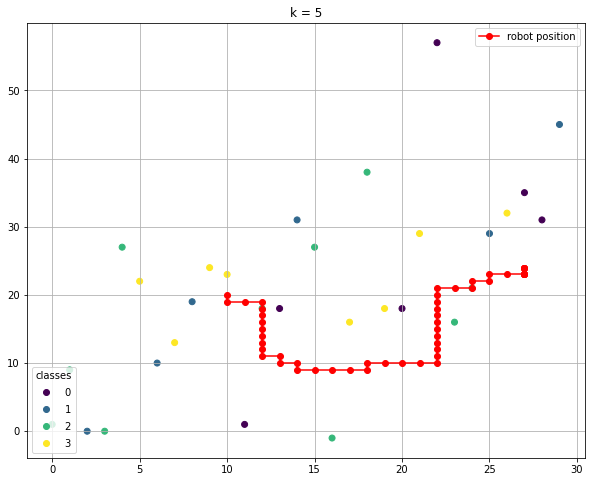

In [ ]:
x = np.arange(30)
conduct_experiment(x, mean=3, std=10, k=5, n_movements=50)

**Задача 2.3 (1 балл)** Как число соседей влияет на траекторию движения робота в нашем эксперименте? Постройте четыре графика с различным числом соседей на ваш выбор. А что было бы в случае, если классы назначаются меткам не случайно, а осмысленно? 

При одном соседе робот двигается в зависимости от ближайшей точки, а при $k \ge 30$ (общее число точек) робот всегда идёт в сторону, определяемую классом с большей численностью точек, с вероятностью 0.8 и вправо с вероятностью 0.2. Можно сказать, что регулируя число соседей $1 < k < 30$, мы увеличиваем (уменьшаем) поле зрения робота. При $k$ близких к общему числу точек, численность точек в каждой классе сильнее влияет на траекторию, когда при $k$ близких к 1, большее влияние оказывают близлижащие точки и начальное положение робота, как следствие. 

Назначая классы меток осмысленно, мы можем контролировать движение робота.

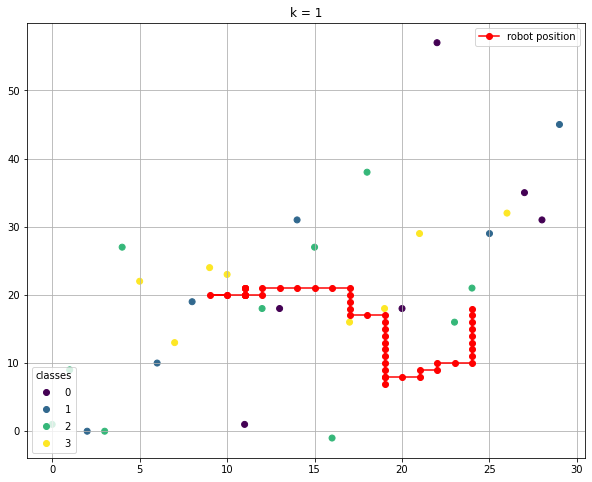

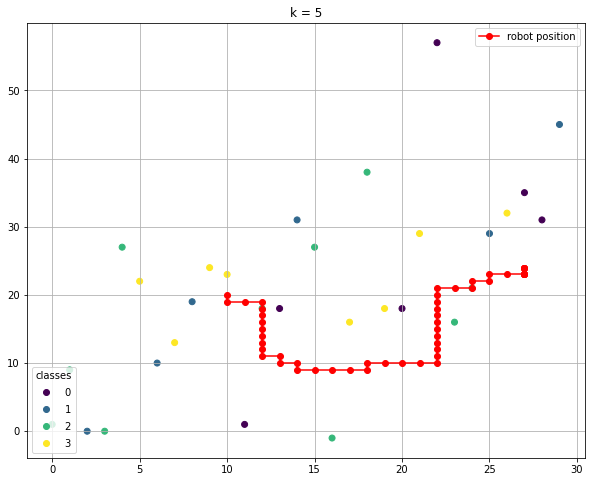

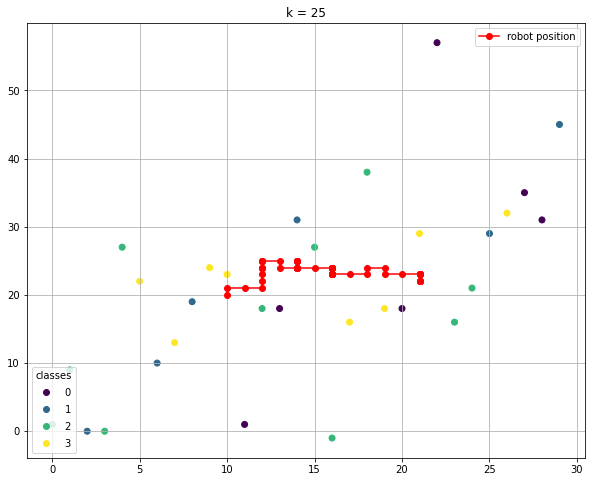

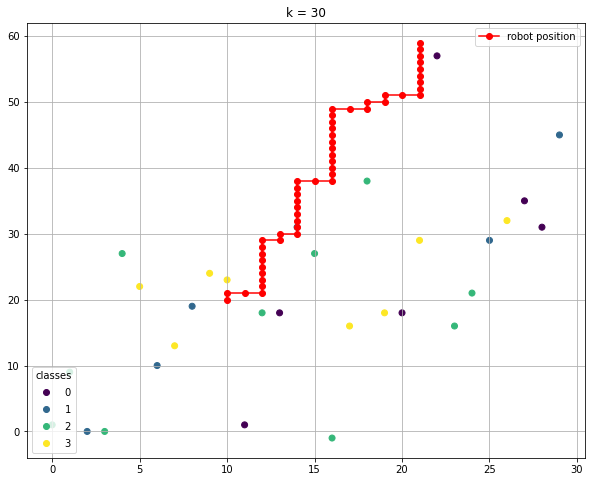

In [ ]:
x = np.arange(30)
for k in [1, 5, 25, 30]:
    conduct_experiment(x, mean=3, std=10, k=k, n_movements=50)

### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2021/homeworks/hw04-knn_linreg/data/diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.1 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их. 

In [ ]:
data.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [ ]:
zero_length = (data['x'] == 0) | (data['y'] == 0) | (data['z'] == 0)
data[zero_length]

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
2207,2208,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,2315,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,4792,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,5472,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,10168,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,11183,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,11964,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,13602,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,15952,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,24395,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


In [ ]:
data = data.drop(index=data[zero_length].index)

In [ ]:
for i in [ 'cut', 'color', 'clarity']:
    print(data[i].unique())

['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
['E' 'I' 'J' 'H' 'F' 'G' 'D']
['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


**Задача 3.2 (0.1 балла)** Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

Удалим столбец индексов.

In [ ]:
data.drop(columns=['Unnamed: 0'], inplace=True)

**Задача 3.3 (0.1 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

In [ ]:
import seaborn as sns

Наибольшая корреляция между ценой и весом алмаза в каратах:

$$
corr(\text{price, carat}) \approx 0.92
$$

Чуть меньше, но всё ещё большая корреляция между ценой и размерами алмаза:

$$
corr(\text{price, x}) \approx 0.89 \newline
corr(\text{price, y}) \approx 0.87 \newline
corr(\text{price, z}) \approx 0.87
$$

С оставшимися вещественными признаками цена коррелирует плохо.

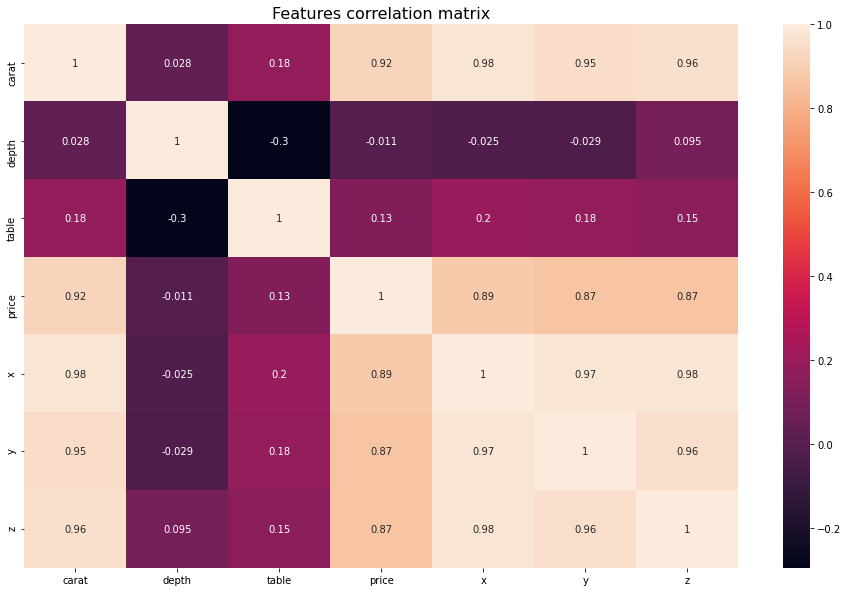

In [ ]:
fig, ax = plt.subplots(figsize=(16, 10))
 
sns.heatmap(data.corr(), annot=True, ax=ax)
ax.set_title('Features correlation matrix', size=16);

**Задача 3.4 (0.1 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
ohe = OneHotEncoder()
cat_features = data.dtypes == 'object'
 
cat_features_encoded = ohe.fit_transform(data[data.columns[cat_features]]).toarray()
num_features = data[data.columns[~cat_features]].drop(columns=['price']).to_numpy()
 
X = np.concatenate([num_features, cat_features_encoded], axis=1)
y = data['price'].to_numpy()

In [ ]:
data.columns[~cat_features]

Index(['carat', 'depth', 'table', 'price', 'x', 'y', 'z'], dtype='object')

In [ ]:
data.columns[cat_features]

Index(['cut', 'color', 'clarity'], dtype='object')

In [ ]:
X

array([[ 0.23, 61.5 , 55.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.21, 59.8 , 61.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.23, 56.9 , 65.  , ...,  0.  ,  0.  ,  0.  ],
       ...,
       [ 0.7 , 62.8 , 60.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.86, 61.  , 58.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.75, 62.2 , 55.  , ...,  0.  ,  0.  ,  0.  ]])

**Задача 3.5 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25022021)

**Задача 3.6 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
 
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Задача 3.7 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
linreg = LinearRegression().fit(X_train_scaled, y_train)
 
print(f'Train: {mean_squared_error(y_train, linreg.predict(X_train_scaled))}')
print(f'Test: {mean_squared_error(y_test, linreg.predict(X_test_scaled))}')

Train: 1242621.7475095263
Test: 1498264.4179665092


**Задача 3.8 (0.2 балла)** Изучите документацию модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

Оценки коэффициентов при категориальных признаках, закодированных методом OneHotEncoding, на порядок больше числовых (`carat`, `depth`, `table`, `x`, `y`, `z`).

In [ ]:
linreg.coef_

array([ 5.48686737e+03, -9.69135592e+01, -6.39761644e+01, -2.23782719e+03,
        9.98662980e+02, -8.58652543e+01, -1.24872463e+14, -2.14685170e+14,
       -3.64702895e+14, -3.24873037e+14, -3.10733071e+14,  8.45502013e+13,
        9.82968823e+13,  9.78420191e+13,  1.04373292e+14,  9.24879993e+13,
        7.69553986e+13,  5.69705574e+13,  2.03698642e+13,  3.19834889e+13,
        7.62121699e+13,  6.65638104e+13,  6.38445174e+13,  7.43018357e+13,
        4.49006937e+13,  5.18212993e+13])

**Задача 3.9 (0.4 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом. 

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией. 

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [ ]:
lasso = Lasso(10).fit(X_train_scaled, y_train)
 
print(f'Lasso train: {mean_squared_error(y_train, lasso.predict(X_train_scaled))}')
print(f'Lasso test: {mean_squared_error(y_test, lasso.predict(X_test_scaled))}')
 
ridge = Ridge(10).fit(X_train_scaled, y_train)
 
print(f'Ridge train: {mean_squared_error(y_train, ridge.predict(X_train_scaled))}')
print(f'Ridge test: {mean_squared_error(y_test, ridge.predict(X_test_scaled))}')

Lasso train: 1257366.3637745988
Lasso test: 1334968.1933609485
Ridge train: 1242922.6270754687
Ridge test: 1408670.93929093


Оценка весов уменьшилась приблизительно 11-12 порядков по сравнению с линейной регрессией без регуляризации. К тому же, при LASSO некоторые веса занулились.

In [ ]:
print(lasso.coef_)
print(ridge.coef_)

[ 4.96574153e+03 -6.76655514e+01 -5.22019050e+01 -7.47816762e+02
 -0.00000000e+00 -7.20883507e+01 -1.26015140e+02 -4.33095452e+01
  3.62857607e+01  0.00000000e+00 -2.78497658e+00  1.35490388e+02
  8.68251674e+01  6.15009343e+01 -0.00000000e+00 -1.75244677e+02
 -2.87143822e+02 -4.06969658e+02 -4.80630402e+02  1.84340743e+02
 -2.66811915e+02 -5.83481076e+02  9.80951672e+01 -0.00000000e+00
  1.73261253e+02  1.88692236e+02]
[ 5441.53453321   -95.59192859   -64.6458855  -1875.88118116
   684.29183358   -87.90008025  -117.89545745   -42.82822419
    46.77503052    28.98795671    -8.23830512   203.99673721
   162.36925276   137.65798314    63.61180636  -125.65704588
  -254.13884393  -388.57510588  -461.22194082   236.84726822
  -152.37281932  -491.79878993   205.2773037    109.30873478
   243.22923943   270.53855267]


**Задача 3.10 (0.4 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов. 


Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

LASSO регрессия уменьшает веса намного агрессивней, чем Ridge регрессия. LASSO регрессию используют для отбора признаком, потому что она может занулить некоторые веса, в отличие от Ridge регрессии.

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11478835833.00618, tolerance: 59689295.40815153
  positive)


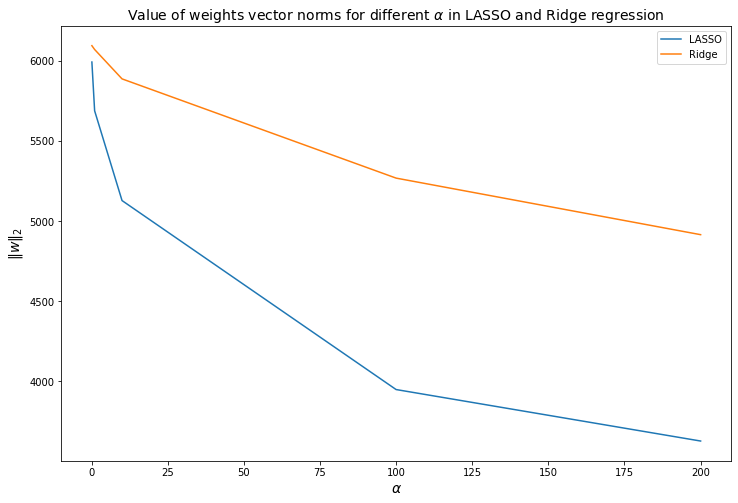

In [ ]:
alphas = [0.1, 1, 10, 100, 200]
lasso_norms = []
ridge_norms = []

for alpha in alphas:
    lasso = Lasso(alpha).fit(X_train_scaled, y_train)
    lasso_norms.append(np.linalg.norm(lasso.coef_))
    
    ridge = Ridge(alpha).fit(X_train_scaled, y_train)
    ridge_norms.append(np.linalg.norm(ridge.coef_))

fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(alphas, lasso_norms, label='LASSO')
ax.plot(alphas, ridge_norms, label='Ridge')


fontsize = 14
ax.set_xlabel(r'$\alpha$', size=fontsize)
ax.set_ylabel(r'$\Vert w \Vert_2$', size=fontsize)
ax.set_title(r'Value of weights vector norms for different $\alpha$ in LASSO and Ridge regression', size=fontsize)
ax.legend();

**Задача 3.11 (0.5 балла)** 
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке. 

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`. 

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество. 

In [ ]:
from sklearn.linear_model import LassoCV

In [ ]:
alphas = [1, 3, 5, 10, 15, 25]
lassoCV = LassoCV(alphas=alphas, cv=5, max_iter=2000)
lassoCV.fit(X_train_scaled, y_train)
lassoCV.alphas_

array([25, 15, 10,  5,  3,  1])

In [ ]:
best_alpha = lassoCV.alphas_[lassoCV.mse_path_.mean(axis=1).argmin()]
best_alpha

5

**Задача 3.12 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

Занулилось по одному из столбцов полученных OneHot кодированием категориальных признаков и один пространственный признак `y`. Таким образом мы избавились от мультиколлинеарности в данных.

In [ ]:
lasso = Lasso(best_alpha)
lasso.fit(X_train_scaled, y_train)
lasso.coef_

array([ 5232.05710889,   -86.50916434,   -59.77371788, -1009.37421235,
          -0.        ,   -67.0319153 ,  -128.06581177,   -48.29991274,
          30.82890356,     0.        ,   -11.72745872,   143.91119792,
          94.50216569,    69.90782311,    -0.        ,  -179.3286943 ,
        -294.51710011,  -415.49591612,  -487.2596642 ,   187.27009215,
        -265.31501778,  -587.0310367 ,   105.05753374,    -0.        ,
         175.02489547,   191.58181579])

**Задача 3.13 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

LASSO линейная регрессия оказалось лучше. так как она ограничила размер для оценок весов и, таким образом, модель имеет большую обобщающую способность по сравнению с моделью с высокими весами, где небольшому изменению признаков соответствуют огромные изменения целевой переменной. Как следствие, предсказания модели LASSO регрессии будут более качественными.

In [ ]:
print(f'LASSO test: {mean_squared_error(y_test, lasso.predict(X_test_scaled))}')
print(f'Linear regression test: {mean_squared_error(y_test, linreg.predict(X_test_scaled))}')

LASSO test: 1329653.060354613
Linear regression test: 1498264.4179665092
